In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

<h3>data analysis<h3>

In [2]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'models',
 'pictures',
 'rps_cnn.ipynb',
 'test',
 'train']

In [3]:
os.listdir('test')

['paper', 'rock', 'scissors']

In [4]:
os.listdir('train')

['paper', 'rock', 'scissors']

In [5]:
rock_dir = 'train\\rock\\' + os.listdir('train\\rock')[0]

In [6]:
rock_img = imread(rock_dir)

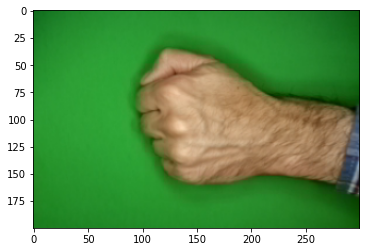

In [7]:
plt.imshow(rock_img)

In [8]:
rock_img

array([[[0.0627451 , 0.40392157, 0.09803922],
        [0.0627451 , 0.41568628, 0.10196079],
        [0.0627451 , 0.41568628, 0.10980392],
        ...,
        [0.05490196, 0.35686275, 0.06666667],
        [0.05098039, 0.3529412 , 0.05490196],
        [0.05098039, 0.34117648, 0.05490196]],

       [[0.0627451 , 0.40392157, 0.10196079],
        [0.06666667, 0.41960785, 0.10588235],
        [0.06666667, 0.41960785, 0.11372549],
        ...,
        [0.05490196, 0.35686275, 0.06666667],
        [0.05490196, 0.36078432, 0.05882353],
        [0.05098039, 0.34117648, 0.05490196]],

       [[0.0627451 , 0.40392157, 0.10196079],
        [0.06666667, 0.41960785, 0.10588235],
        [0.07058824, 0.42745098, 0.10980392],
        ...,
        [0.05098039, 0.36862746, 0.06666667],
        [0.04705882, 0.36078432, 0.05882353],
        [0.04705882, 0.34901962, 0.05490196]],

       ...,

       [[0.09803922, 0.46666667, 0.10980392],
        [0.10588235, 0.4862745 , 0.11764706],
        [0.10980392, 0

In [9]:
rock_img.max()

0.9882353

In [10]:
rock_img.min()

0.0

In [11]:
rock_img.shape

(200, 300, 3)

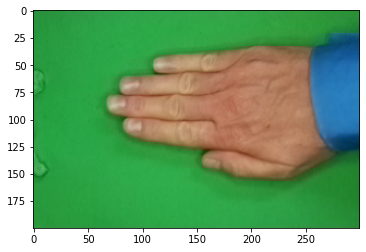

In [12]:
paper_dir = 'train\\paper\\' + os.listdir('train\\paper')[0]
paper_img = imread(paper_dir)
plt.imshow(paper_img)

In [13]:
paper_img.shape

(200, 300, 3)

In [14]:
len(os.listdir('train\\rock'))

626

In [15]:
len(os.listdir('train\\paper'))

612

In [16]:
len(os.listdir('train\\scissors'))

650

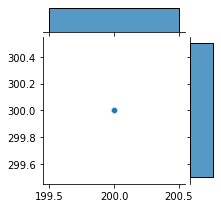

In [17]:
dim1 = []
dim2 = []
for dir1 in ['train\\','test\\']:
    for dir2 in os.listdir(dir1):
        for img_name in os.listdir(dir1 + dir2): 
            img = imread(dir1 + dir2 + '\\' + img_name)
            d1,d2,colors = img.shape
            dim1.append(d1)
            dim2.append(d2)
sns.jointplot(x=dim1,y=dim2,height=3)

<h3>preparing image generator<h3>

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [20]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

In [21]:
rock_img[0][0][0]

0.0627451

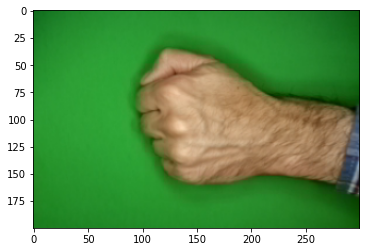

In [22]:
plt.imshow(rock_img)

In [23]:
image_gen.random_transform(rock_img)[0][0][0]

0.12959069

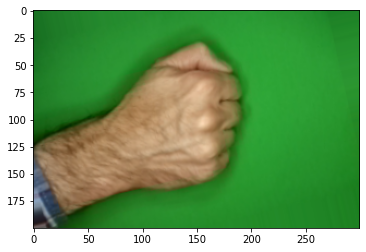

In [24]:
plt.imshow(image_gen.random_transform(rock_img))

In [25]:
image_gen.flow_from_directory('train')

Found 1888 images belonging to 3 classes.


In [26]:
image_gen.flow_from_directory('test')

Found 300 images belonging to 3 classes.


<h3>creating model<h3>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [28]:
image_shape = (60, 90, 3)

In [29]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 88, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 44, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 42, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 19, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 9, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1440)              0

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

<h3>training the model<3>

In [33]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module tensorflow.python.keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Arguments:
        directory: string, path to the target directory. It should contain one
          subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside
          each of the subdirectories directory tree will be included in the
          generator. See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
              for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
         

In [34]:
batch_size = 16

In [35]:
train_image_gen = image_gen.flow_from_directory('train',
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 1888 images belonging to 3 classes.


In [36]:
test_image_gen = image_gen.flow_from_directory('test',
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 300 images belonging to 3 classes.


In [37]:
train_image_gen.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [38]:
results = model.fit(train_image_gen,
                    epochs=20,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/20
118/118 [==============================] - 23s 195ms/step - loss: 0.8278 - accuracy: 0.6054 - val_loss: 0.3495 - val_accuracy: 0.8800
Epoch 2/20
118/118 [==============================] - 23s 192ms/step - loss: 0.3153 - accuracy: 0.8951 - val_loss: 0.1511 - val_accuracy: 0.9500
Epoch 3/20
118/118 [==============================] - 22s 186ms/step - loss: 0.2661 - accuracy: 0.9094 - val_loss: 0.2329 - val_accuracy: 0.9367
Epoch 4/20
118/118 [==============================] - 22s 183ms/step - loss: 0.2220 - accuracy: 0.9375 - val_loss: 0.1787 - val_accuracy: 0.9533


In [39]:
from datetime import datetime

In [40]:
timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save('models\\' + timestamp)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models\2020-11-03--00-39\assets


<h3>model evaluation<h3>

In [43]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

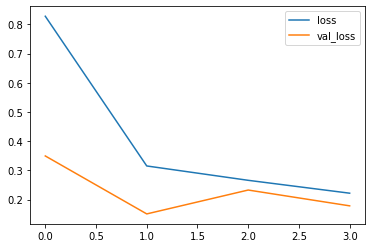

In [44]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

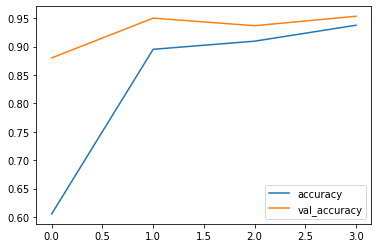

In [45]:
losses[['accuracy','val_accuracy']].plot()

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
model.evaluate(test_image_gen)

19/19 [==============================] - 1s 74ms/step - loss: 0.1328 - accuracy: 0.9600


[0.1327662169933319, 0.9599999785423279]

In [48]:
pred_probabilities = model.predict(test_image_gen)

In [49]:
pred_probabilities

array([[9.98644412e-01, 9.61169775e-04, 3.94442992e-04],
       [9.87923324e-01, 1.10879401e-03, 1.09679047e-02],
       [9.79681253e-01, 1.15137035e-02, 8.80510174e-03],
       [9.30667400e-01, 5.27755097e-02, 1.65570509e-02],
       [9.31613624e-01, 6.57739565e-02, 2.61243712e-03],
       [9.83586848e-01, 4.35541337e-03, 1.20576462e-02],
       [7.26674736e-01, 1.65982693e-02, 2.56727010e-01],
       [4.74497855e-01, 4.97021288e-01, 2.84809023e-02],
       [9.69150245e-01, 2.93196123e-02, 1.53013587e-03],
       [9.30491507e-01, 6.72980547e-02, 2.21042917e-03],
       [9.74400818e-01, 3.69285699e-03, 2.19063163e-02],
       [9.81743574e-01, 1.69467479e-02, 1.30973489e-03],
       [9.36985254e-01, 1.20646378e-03, 6.18082695e-02],
       [6.82858229e-01, 3.16257983e-01, 8.83790723e-04],
       [6.68877125e-01, 3.14894170e-01, 1.62287373e-02],
       [9.13432300e-01, 8.61643180e-02, 4.03306622e-04],
       [9.62277174e-01, 2.21535433e-02, 1.55692194e-02],
       [6.78358018e-01, 9.92593

In [50]:
pred_probabilities.shape

(300, 3)

In [51]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
predictions = np.argmax(model.predict(test_image_gen), axis=-1)

In [54]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       100
           1       0.94      0.95      0.95       100
           2       0.94      0.97      0.96       100

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [55]:
confusion_matrix(test_image_gen.classes,predictions)

array([[88,  6,  6],
       [ 5, 95,  0],
       [ 3,  0, 97]], dtype=int64)

<h3>testing predictions<h3>

In [1]:
# from tensorflow.keras.models import load_model

In [2]:
# model = load_model('models//2020-11-03--00-39')

In [3]:
# model.summary()

In [4]:
# from tensorflow.keras.preprocessing import image

In [5]:
# no_images = 15

In [6]:
# plt.figure(figsize=(12,10))
# grid_x = 6
# grid_y = int(no_images/3)

# for i in range(no_images):
#     my_image = image.load_img('pictures\\' + str(i+1)+'.jpg',target_size=image_shape,color_mode="rgb")
#     my_image = image.img_to_array(my_image)
#     my_image_p = np.expand_dims(my_image, axis=0)
#     label_no = np.argmax(model.predict(my_image_p))
#     for key, value in train_image_gen.class_indices.items():
#         if value == label_no:
#             label = key
            
#     plt.subplot(grid_y,grid_x,i*2+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)       
#     plt.imshow(my_image/255)
#     plt.xlabel(label)
    
#     plt.subplot(grid_y,grid_x,i*2+2)
#     plt.yticks([])
#     plt.grid(False)
#     plt.bar(range(3),model.predict(my_image_p).reshape(3))